## Regression

Problems with **quantitative** response.

[LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

[KNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

[make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

colors = plt.rcParams['axes.color_cycle']

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets.samples_generator import make_regression

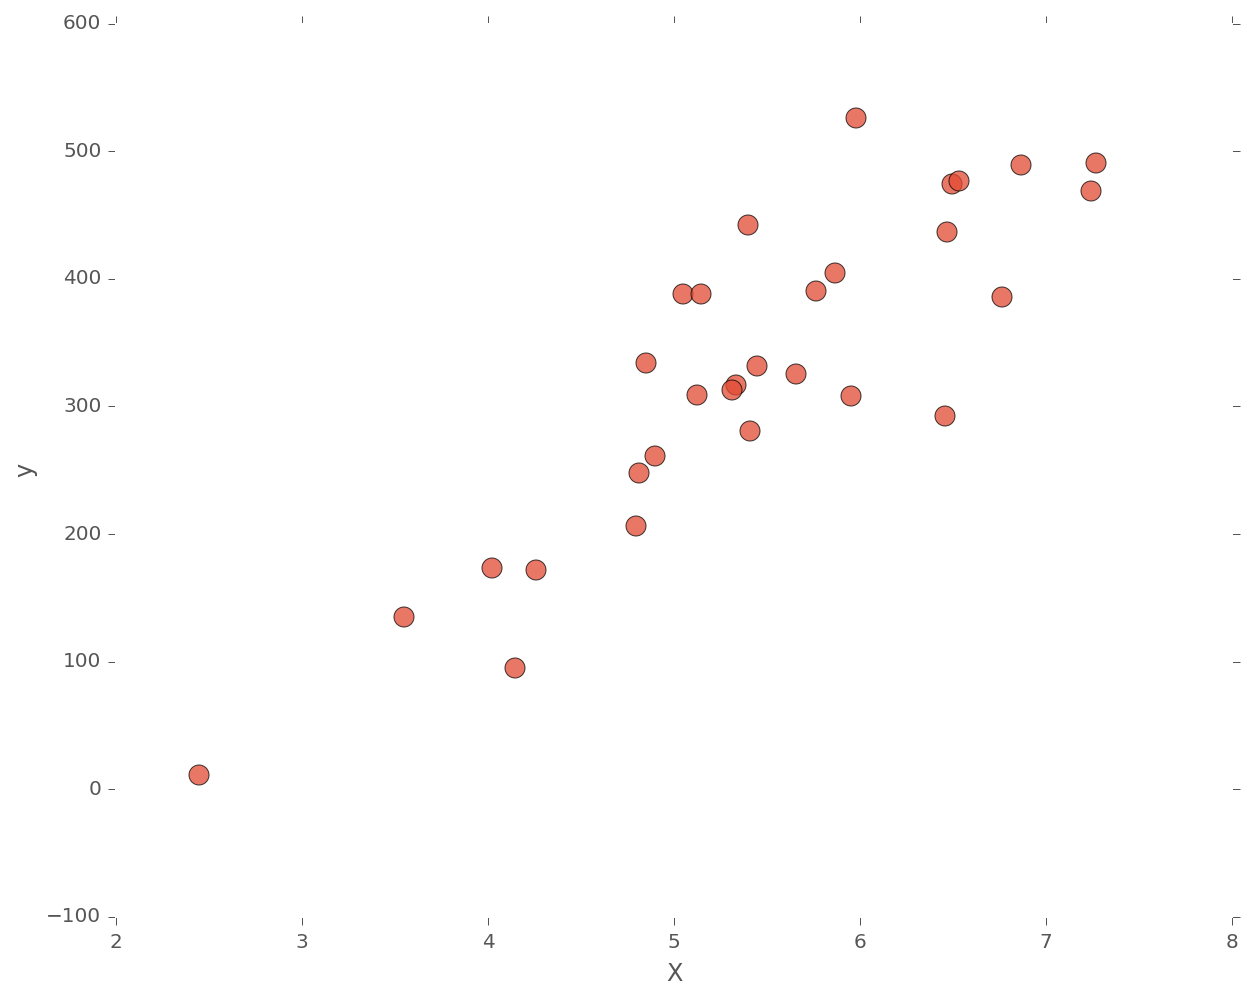

In [7]:
X, y = make_regression( n_samples=30, n_features=1, n_informative=1, random_state=0, noise=75) 
X = X + 5
y = y + 300

def plot():
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], y, s=100, alpha=0.75, c=colors[0])
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    
plot()

### Linear Regression

Linear Regression is an **optimization problem**.

Given a matrix of $X$ inputs and a vector of $y$ outputs, we are trying to find the parameters $\theta$ that best fit the predicted $\hat{y}$ values to the actual $y$ values.

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ...$$

If we add a column of ones to our $X$ matrix, which represents our $\theta_0$, we have the matrix form:

$$\hat{y} = X \theta$$

The optimization problem is to minimize the following cost function:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(\hat{y^i} - y^{(i)} \right)^2$$

In [8]:
regr = LinearRegression()
regr.fit(X, y)

print regr.intercept_, regr.coef_
print regr.score(X,y)

-220.348130992 [ 100.96917215]
0.759670081702


In [12]:
X_new = np.linspace(2, 8, 10)[:, np.newaxis] # to make it (n, m)
y_pred = regr.predict(X_new)

In [15]:
def plot():
    fig, ax = plt.subplots()

    ax.plot(X_new[:,0], y_pred, color='darkgrey', linewidth=2)
    ax.scatter(X[:,0], y, s=100, alpha=0.75, c=colors[0])

    ax.set_xlabel('X')
    ax.set_ylabel('y')

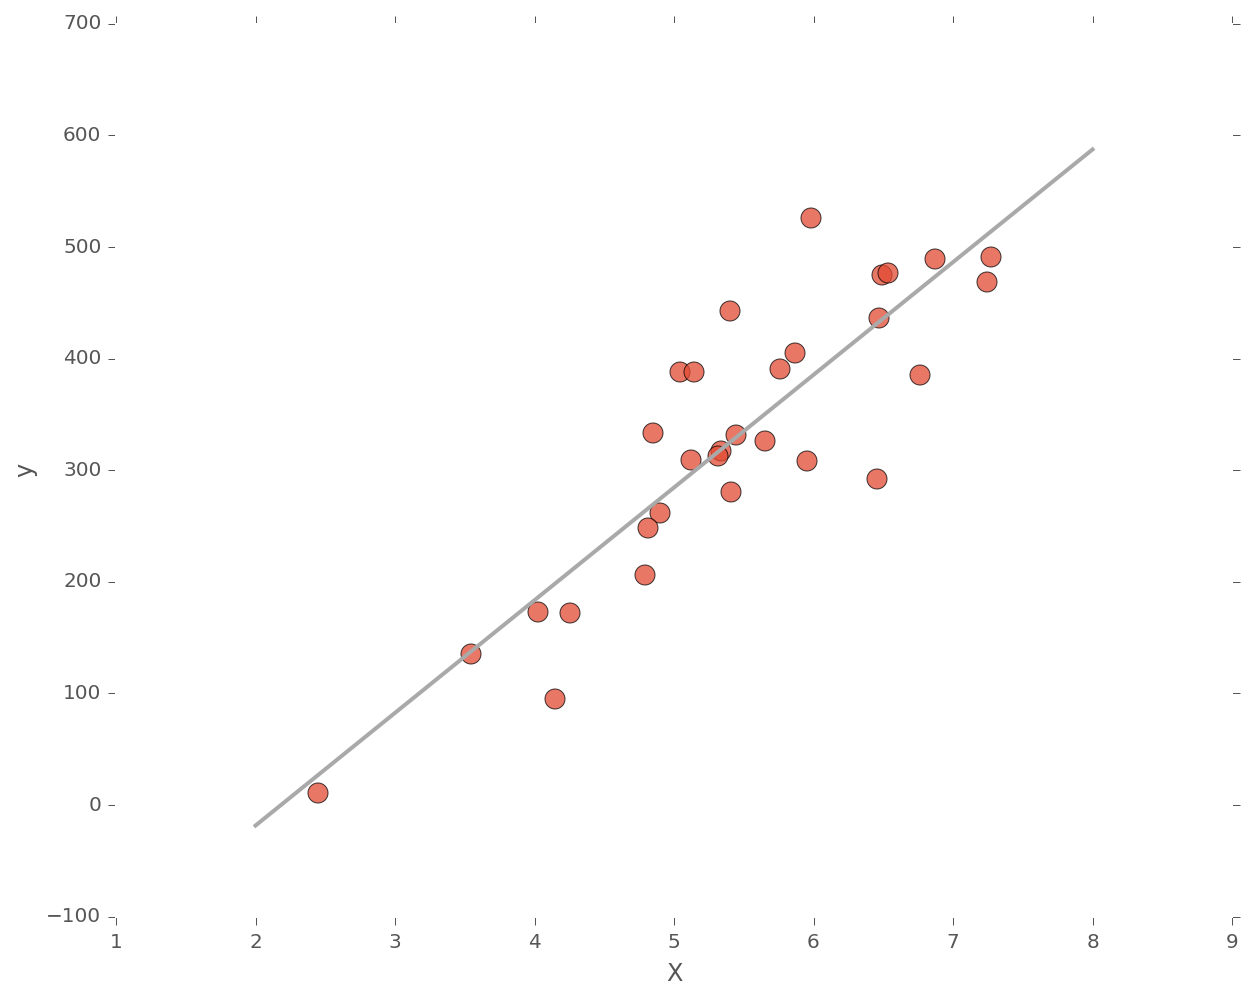

In [16]:
plot()

### Nearst Neighbors

Estimate the model value based on the `k` nearest points. 

[KNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [17]:
KNeighborsRegressor()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform')

[DistanceMetric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

- manhattan_distance (p == 1)
- euclidean_distance (p == 2)

In [18]:
regr_nn = KNeighborsRegressor()
regr_nn.fit(X, y)

print regr_nn.score(X,y)

0.781550018011


In [19]:
def plot():
    fig, ax = plt.subplots()

    ax.scatter(X[:,0], y, edgecolor='none', s=100, alpha=0.75, c=colors[0])
    ax.plot(X_new[:,0], regr_nn.predict(X_new), color='darkgrey', linewidth=2)

    ax.set_xlabel('X')
    ax.set_ylabel('y')

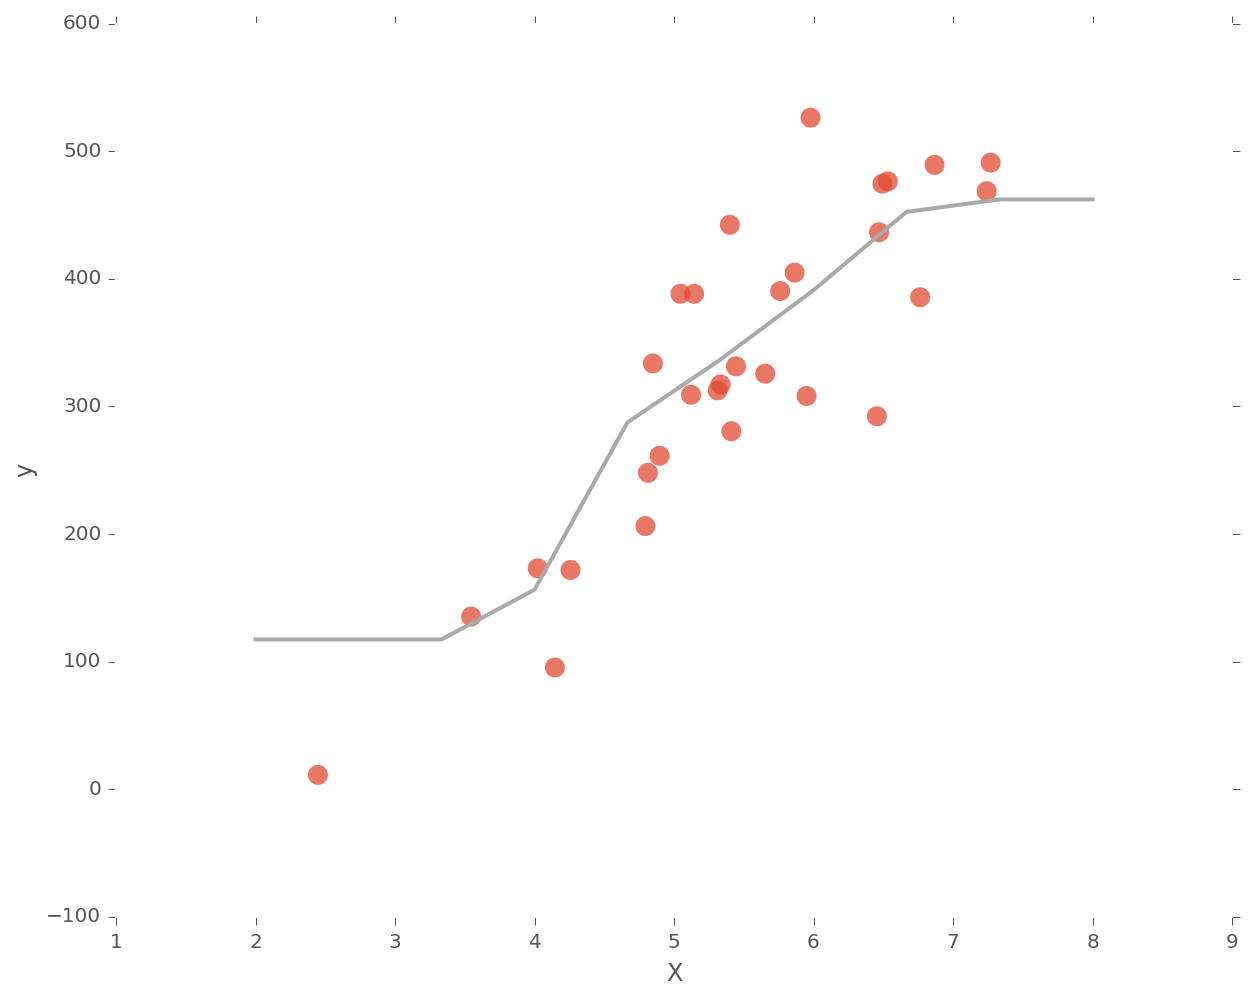

In [20]:
plot()

### How do they Work?

In [21]:
X, y = make_regression( n_samples=15, n_features=1, n_informative=1,
                        random_state=1, noise=35) 
X = X + 5
y = y + 250

In [22]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
def plot():
    fig, ax = plt.subplots()

    ax.vlines(X[:,0], regr.predict(X), y, color='grey')
    ax.scatter(X[:,0], y, s=100, alpha=1., c=colors[0])
    ax.plot(X_new[:,0], regr.predict(X_new) , color='darkgrey', linewidth=2)

    ax.set_xlabel('X')
    ax.set_ylabel('y')

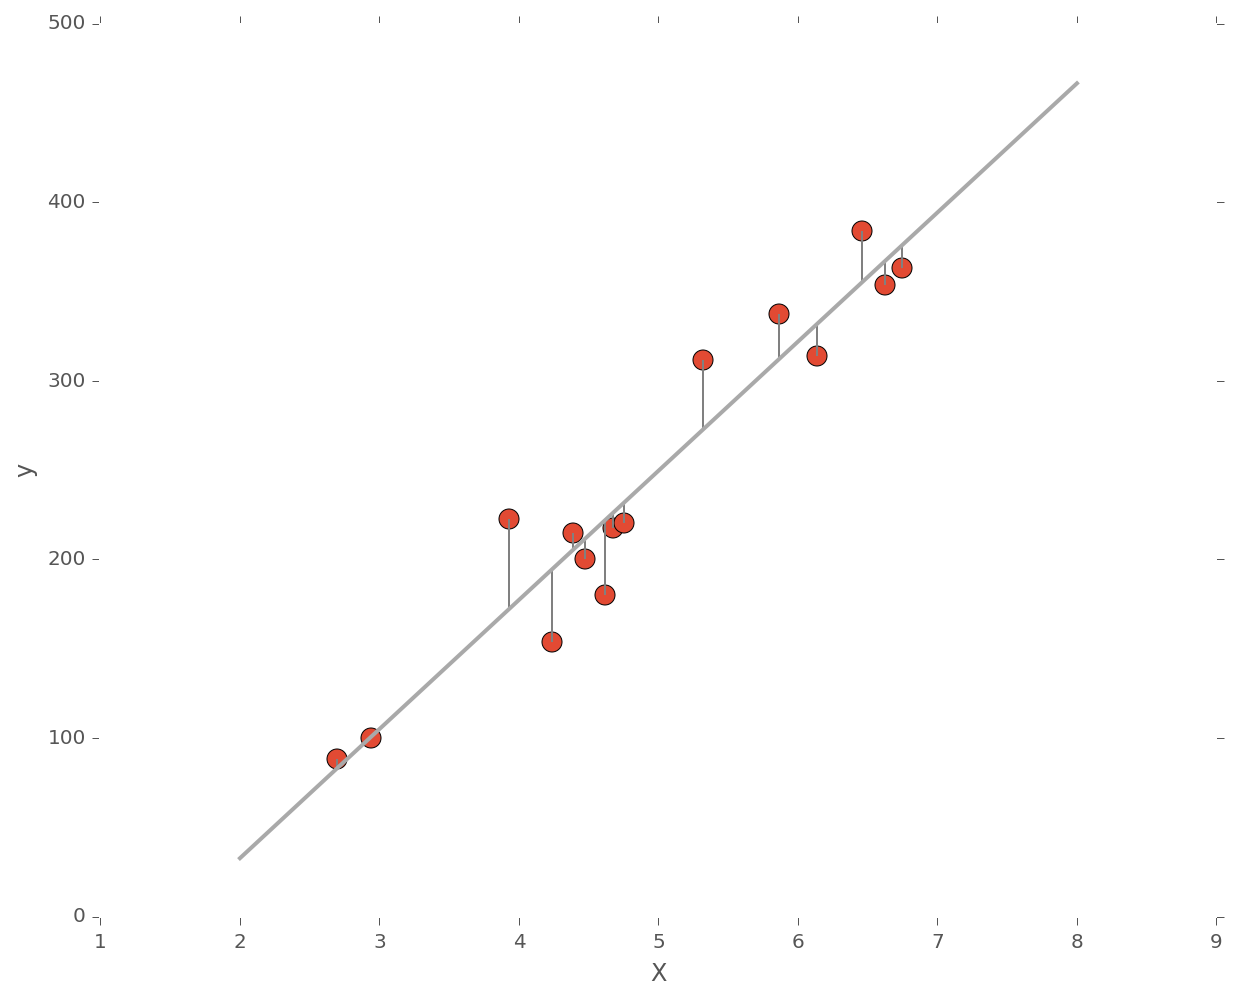

In [26]:
plot()

In [27]:
from sklearn import metrics

h = 50
xx, yy = np.meshgrid(np.linspace(0, regr.intercept_*2.0, h),
                     np.linspace(0, regr.coef_[0]*2.0, h))

Z = np.c_[xx.ravel(), yy.ravel()]
res = map(lambda z: metrics.mean_squared_error(y, z[0] + z[1]*X), Z)
res2 = np.array(res).reshape(xx.shape)

points = np.c_[ Z[np.argsort(res)[650]], np.array([regr.intercept_, regr.coef_[0]])].T

In [30]:
def contour(ax):
    ax.contour(xx, yy, res2, 50, alpha=0.20, cmap=plt.cm.Greys_r)
    ax.contourf(xx, yy, res2, 50, alpha=0.20, cmap=plt.cm.Greys)
    ax.scatter(regr.intercept_, regr.coef_[0] , s=70, 
               alpha=0.75, c=colors[0])
    ax.scatter(points[0][0], points[0][1], c=colors[1], s=70)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    ax.set_ylabel('coef_')
    ax.set_xlabel('intercept_')

def line(ax):
    ax.vlines(X[:,0], regr.predict(X), y, color='grey')
    ax.plot(X_new[:,0], points[0][0] + points[0][1]*X_new[:,0], color=colors[1])
    ax.plot(X_new[:,0], points[1][0] + points[1][1]*X_new[:,0], color=colors[0])
    ax.scatter(X[:,0], y, s=70, alpha=1., c=colors[0])
    ax.set_xlabel('X')
    ax.set_ylabel('y')

def plot():    
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    contour(ax[0])
    line(ax[1])

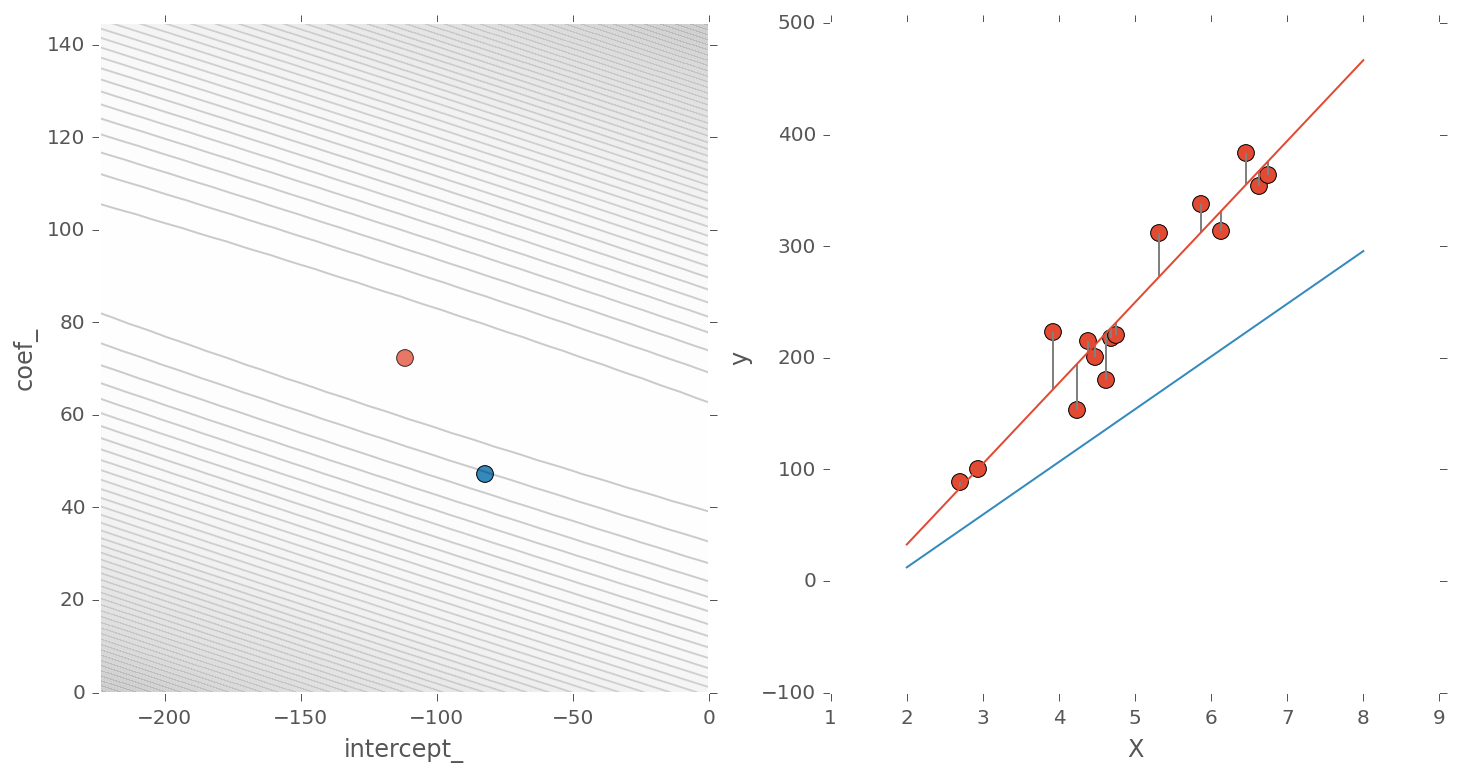

In [31]:
plot()

In [32]:
regr_nn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform')

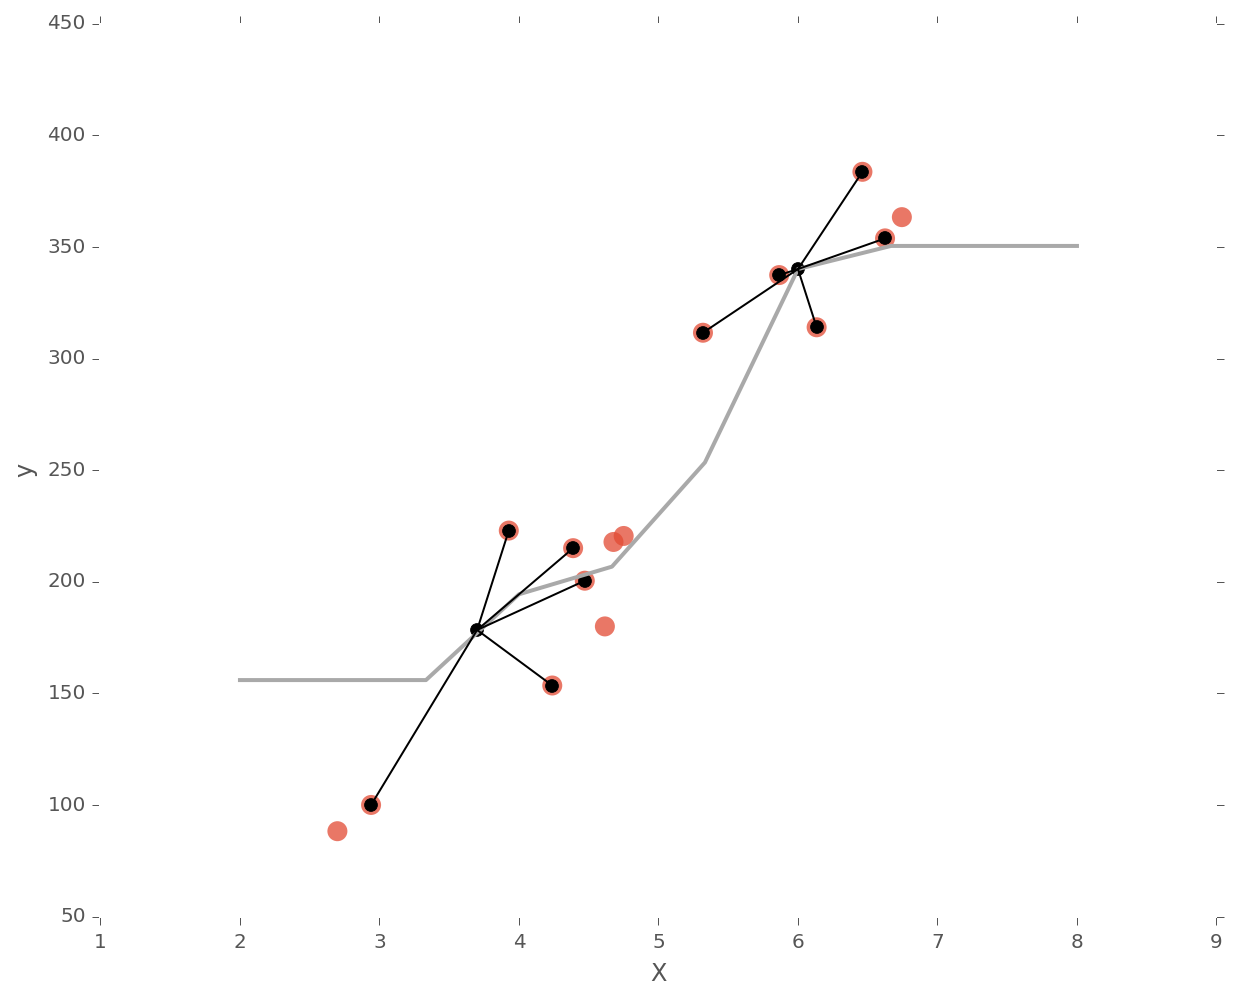

In [33]:
fig, ax = plt.subplots()

ax.scatter(X[:,0], y, edgecolor='none', s=100, alpha=0.75, c=colors[0])
ax.plot(X_new[:,0], regr_nn.predict(X_new), color='darkgrey', linewidth=2)

pt = 3.7
neighbors = np.argsort(np.sqrt(np.square(X[:,0] - pt)))[:5]
for i in range(5):
    ax.plot( [ pt, X[neighbors[i]][0]] , [np.mean(y[neighbors]), y[neighbors[i]]], color='black' )
ax.scatter(X[neighbors], y[neighbors], c='black', s=40)
ax.scatter(pt, np.mean(y[neighbors]), c='black', s=40)

pt = 6
neighbors = np.argsort(np.sqrt(np.square(X[:,0] - pt)))[:5]
for i in range(5):
    ax.plot( [ pt, X[neighbors[i]][0]] , [np.mean(y[neighbors]), y[neighbors[i]]], color='black' )
ax.scatter(X[neighbors], y[neighbors], c='black', s=40)
ax.scatter(pt, np.mean(y[neighbors]), c='black', s=40)

ax.set_xlabel('X')
ax.set_ylabel('y')

## Classification

Problems with **qualitative** (categorical) response.

[KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

[.make_circles](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets.samples_generator import make_classification
from sklearn.datasets import make_circles

A few general methods

In [37]:
def plotXY():
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, alpha=0.75, edgecolor='none')
    ax.set_xlabel('X[:,0]')
    ax.set_ylabel('X[:,1]')

In [38]:
def plot(clf):
    h = 50
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))

    clf.fit(X, y)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.15, levels=[0,0.5,1], cmap=plt.cm.Greys)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, alpha=0.75, edgecolor='none')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X[:,0]')
    ax.set_ylabel('X[:,1]')

### Madelon dataset

In [39]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=6, n_clusters_per_class=1)

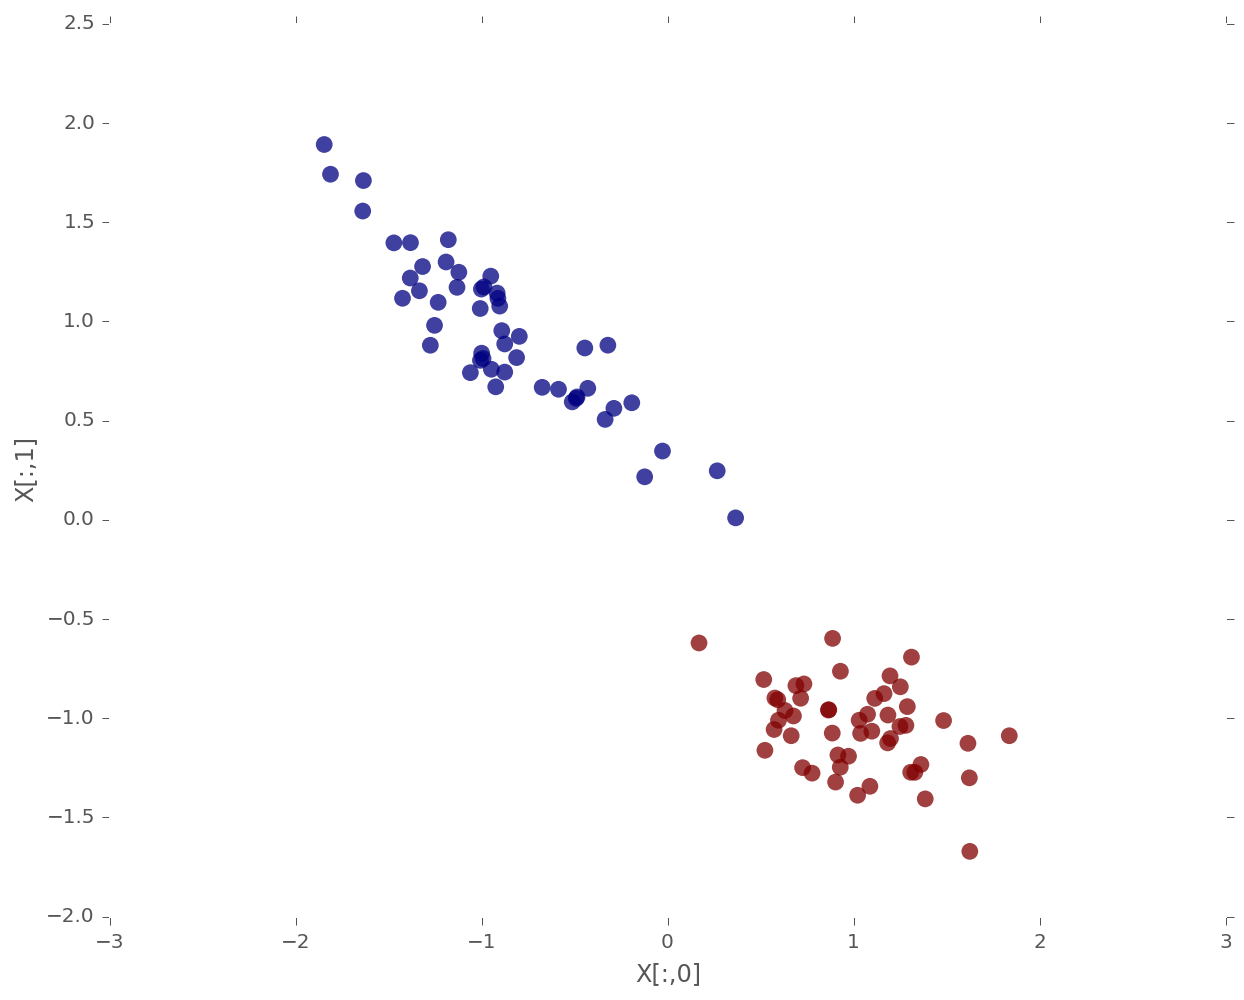

In [40]:
plotXY()

In [41]:
clf = KNeighborsClassifier()
clf.fit(X, y)
print clf.score(X,y)

1.0


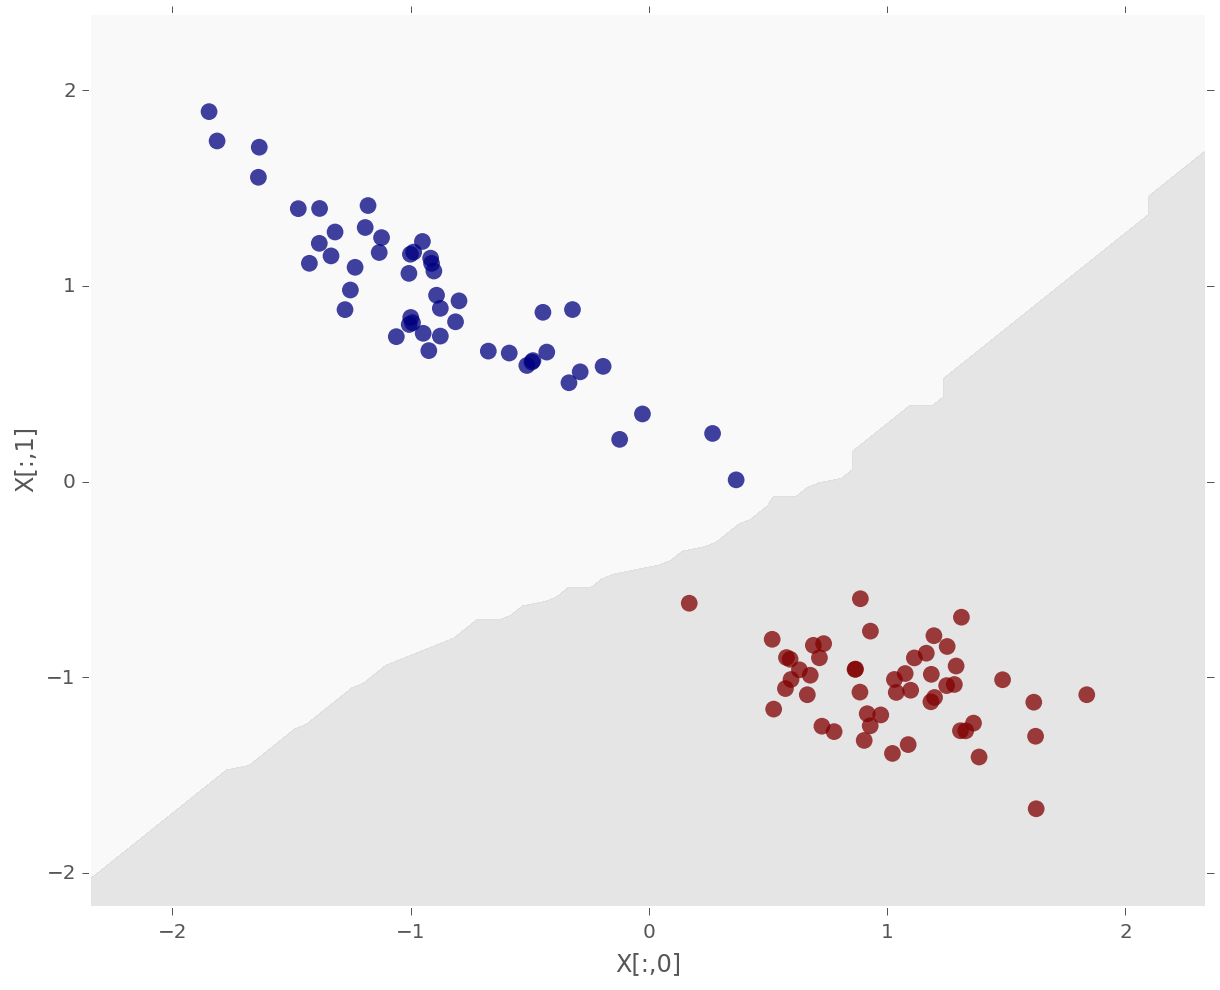

In [42]:
plot(clf)

### Logistic Regression 

[LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [43]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

The value `C` is the regularization parameter (coming soon).

In [44]:
clf = LogisticRegression()
clf.fit(X, y)
print clf.score(X,y)

0.99


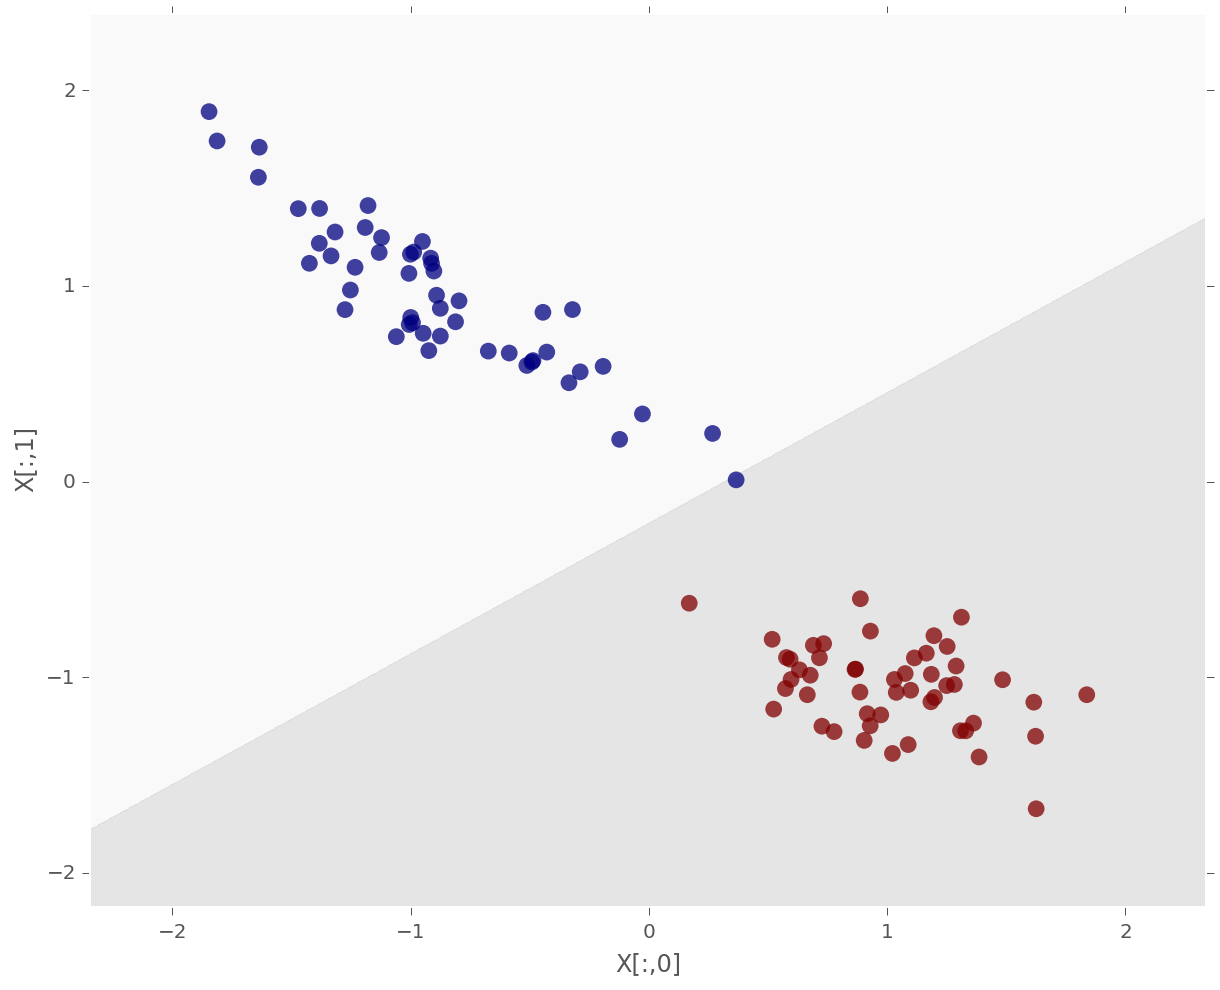

In [45]:
plot(clf)

Still and optimization problem.  Uses a `sigmoid` function for the boundary.

### Circles

In [46]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

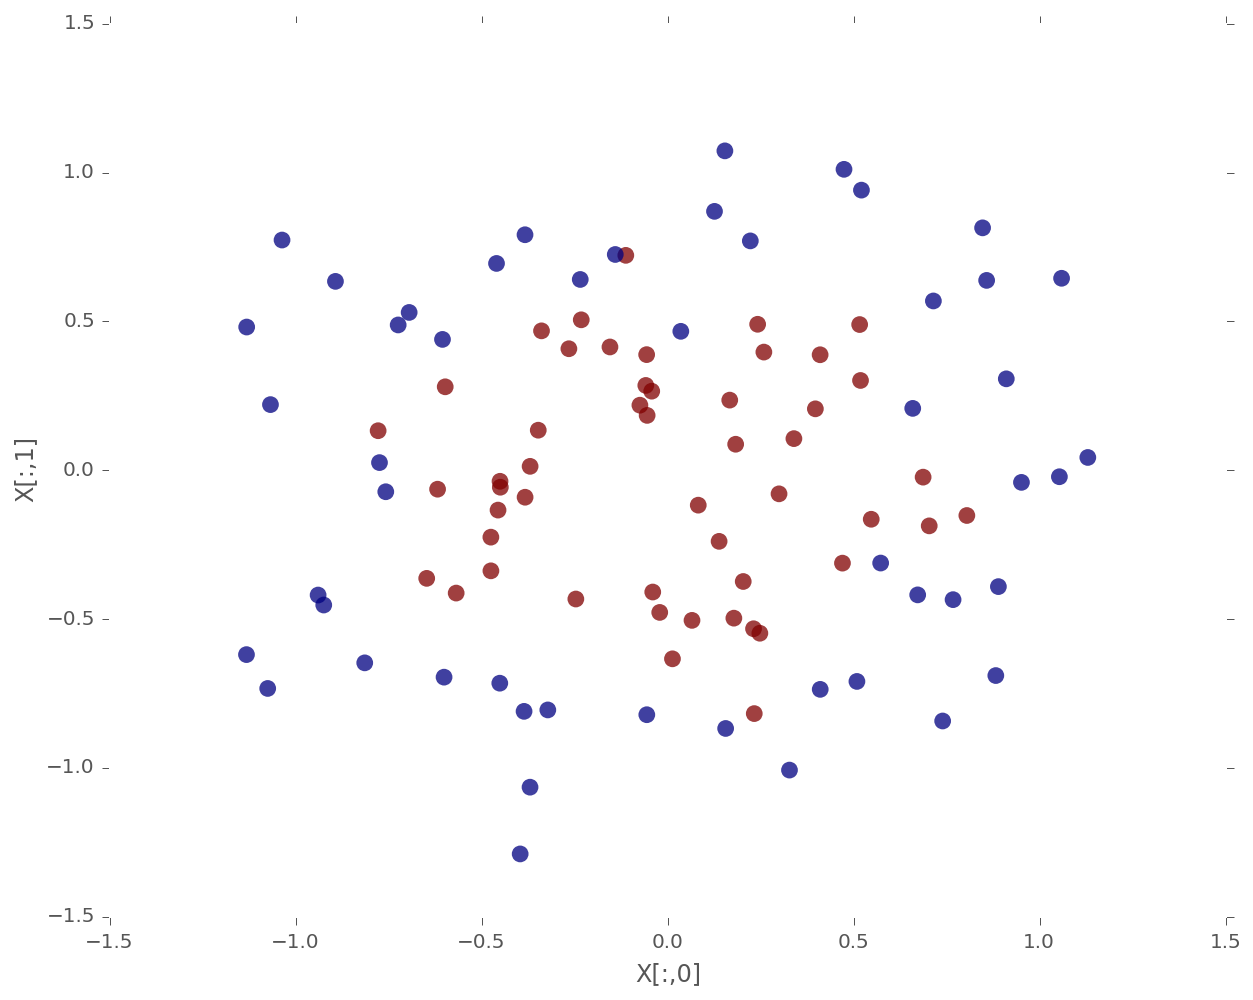

In [47]:
plotXY()

In [48]:
clf = KNeighborsClassifier()
clf.fit(X, y)
print clf.score(X,y)

0.9


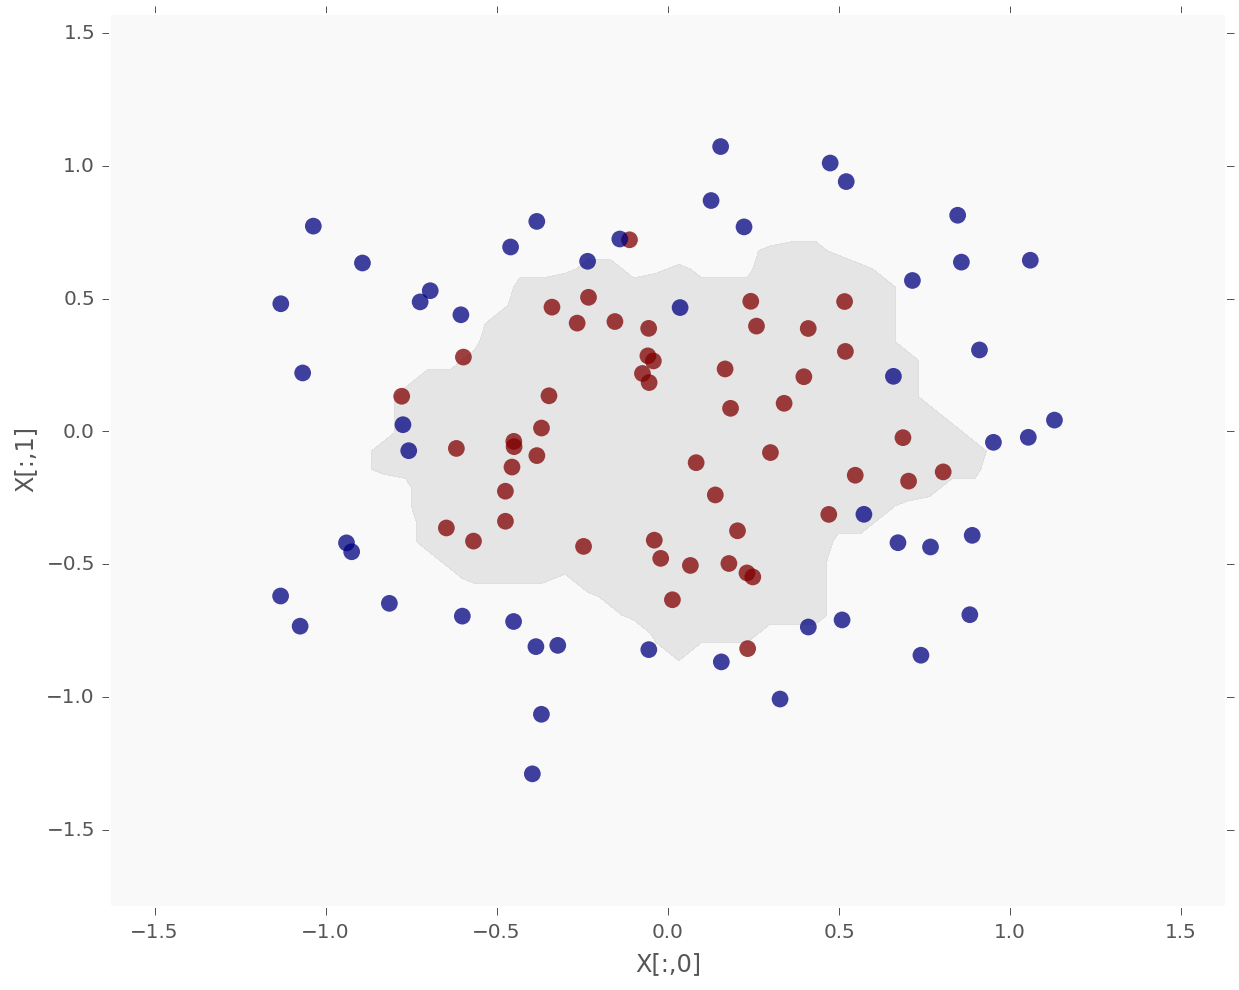

In [49]:
plot(clf)

In [50]:
clf = LogisticRegression()
clf.fit(X, y)
print clf.score(X,y)

0.48


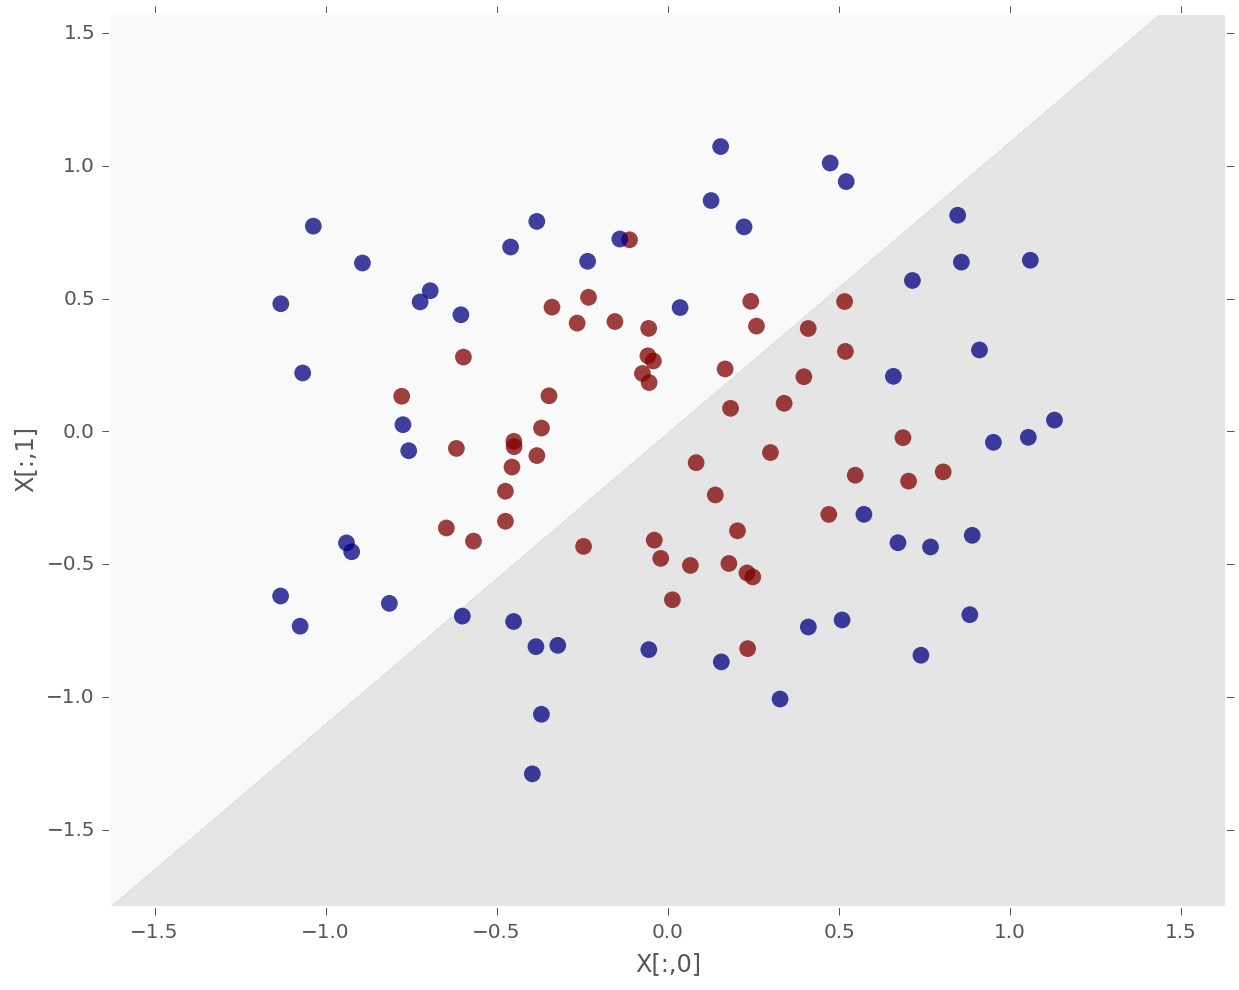

In [51]:
plot(clf)

### Support Vector Machines 

[svm](http://scikit-learn.org/stable/modules/svm.html)

[Support Vector Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)(e.g. soft margin classifier)

What if the boundary is non-linear?

1. We could enlarge the feature space to include non-linear terms (example one).

2. More effiently might be to use a different, non-linear kernel [Support Vector Machine](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).


In [62]:
def plot(clf):
    h = 50
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))

    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.15, levels=[0,0.5,1], cmap=plt.cm.Greys)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, alpha=0.75, edgecolor='none')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X[:,0]')
    ax.set_ylabel('X[:,1]')

In [63]:
from sklearn.svm import LinearSVC, SVC

In [64]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=6, n_clusters_per_class=1)

1.0


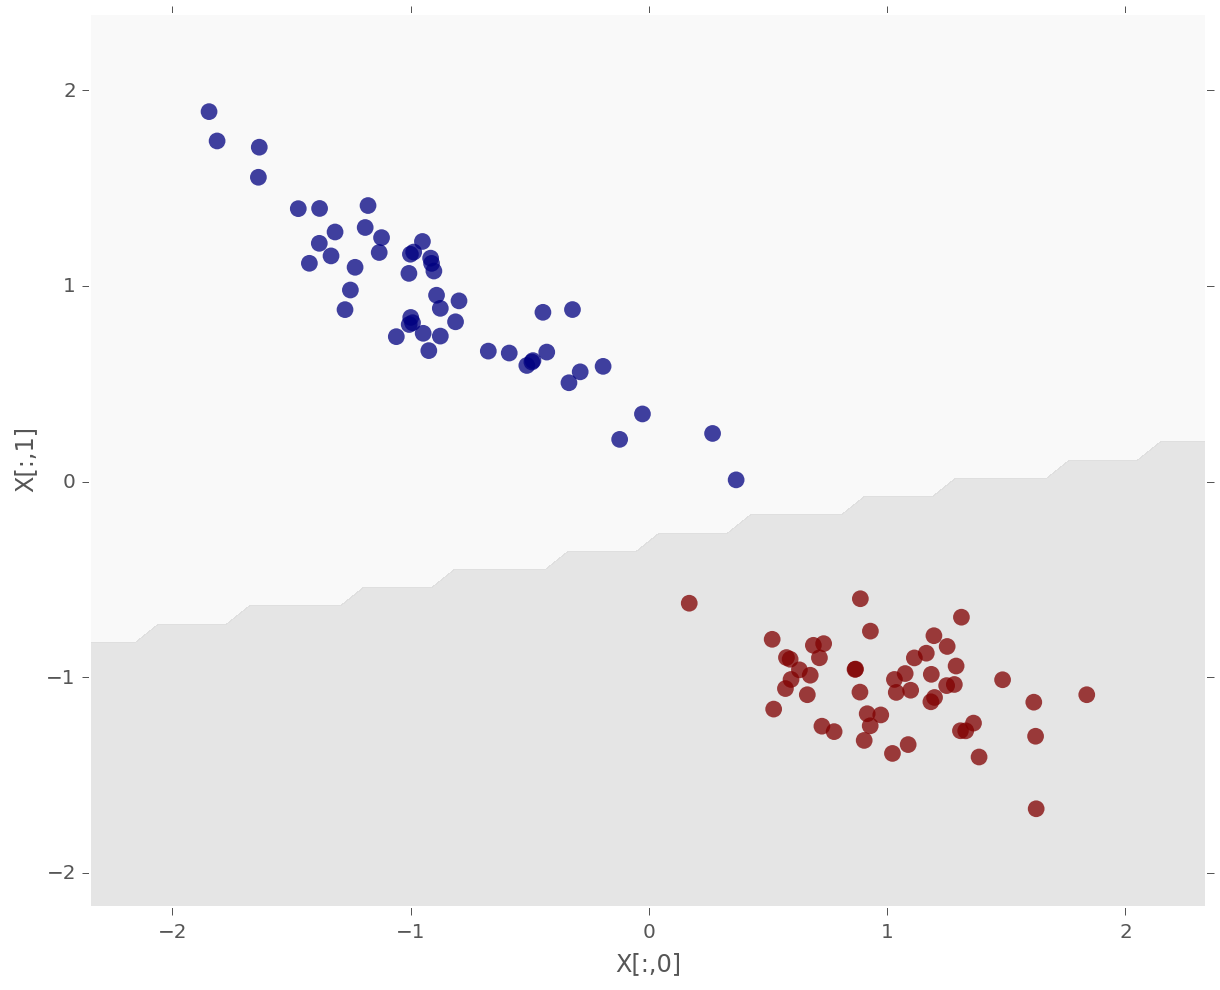

In [66]:
clf = LinearSVC()
clf.fit(X, y)
print clf.score(X,y)
plot(clf)

0.48


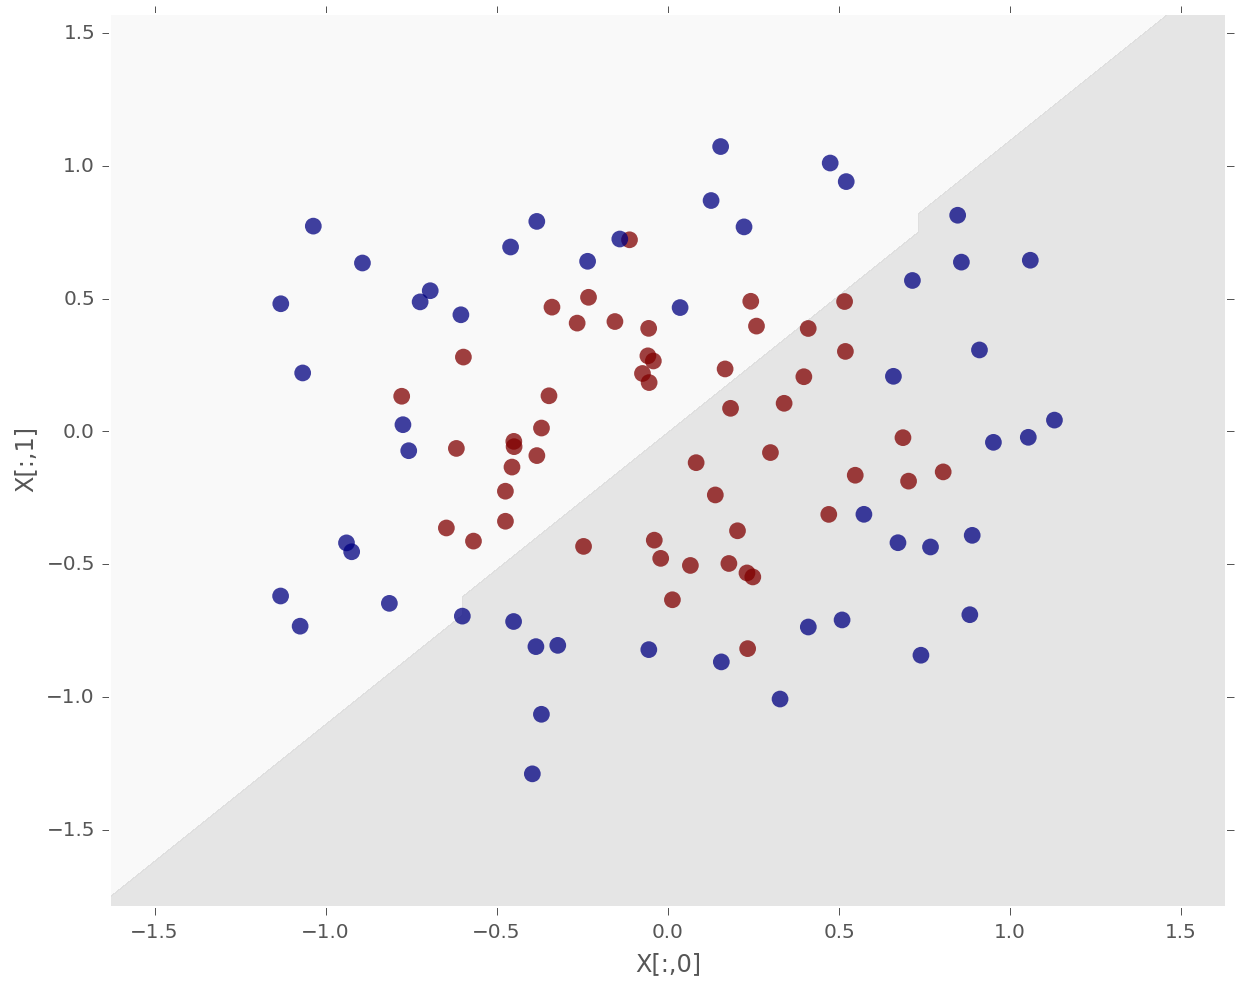

In [67]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

clf = LinearSVC()
clf.fit(X, y)
print clf.score(X,y)
plot(clf)

0.92


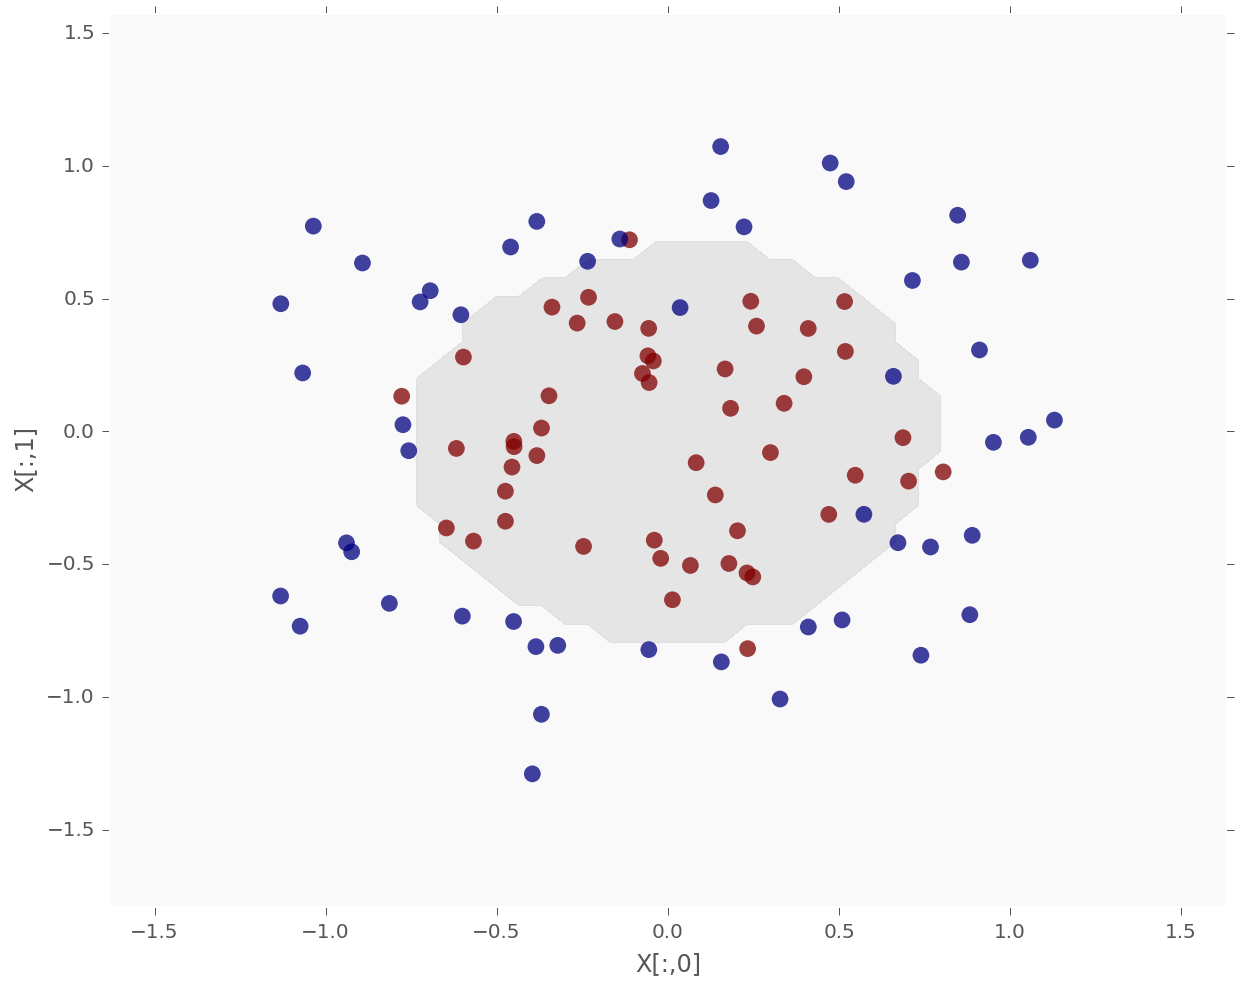

In [68]:
clf = SVC(probability=True)
clf.fit(X, y)
print clf.score(X,y)
plot(clf)